In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
zola='Zola-Emile'
dumas='Dumas-Alexandre'
dumas_pere='Dumas-Alexandre-Pere'
balzac='Balzac-Honore-de'
liste_auteurs=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
with open("test_dumas_etc-llda-doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        #docname=replace_all(docname, liste_auteurs)
        mallet_docnames.append(docname[5:-4])
        print(docname[5:-4])
        index_topic=0
        for share in grouper(1, values):
            triple = (docname[5:-4], index_topic, float(share[0]))
            doctopic_triples.append(triple)
            index_topic+=1

Zola-Emile_La-curee
Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC
Verne-Jules_Nord-contre-Sud
Verne-Jules-_La-Jangada-huit-cent-lieues-sur-l-Amazone]
Zola-Emile_Pot-Bouille
Dumas-Alexandre_Le-Comte-de-Monte-Cristo
Sand-George_Consuelo
Balzac-Honore-de_Illusions-perdues
Zola-Emile_Germinal
Zola-Emile_L-assomoir
Verne-Jules_L-Ile-Mysterieuse
Verne-Jules_Le-Chateau-des-Carpathes
Sand-George_François-le-champi
Zola-Emile_La-faute-de-l-abbe-Mouret
Zola-Emile_Nana
Dumas-Alexandre_La-Tulipe-noire
Sand-George_Le-meunier-d-Angibault
 Verne-Jules_Voyage-au-centre-de-la-Terre
Sand-George_Le-chateau-des-Desertes
Dumas-Alexandre_La-San-Felice
Dumas-Alexandre_Les-Trois-Mousquetaires
Flaubert-Gustave_La-tentation-de-saint-Antoine
Verne-Jules_Le-Phare-du-Bout-du-Monde
Balzac-Honore-de_Une-tenebreuse-affaire
Dumas-Alexandre-Pere_La-fille-du-marquis-II
Flaubert-Gustave_Bouvard-et-Pecuchet
Dumas-Alexandre_La-dame-aux-camelias
Zola-Emile_Une-page-d-amour
Flaubert-Gustave_Salammbo
Dumas-Alexandre

In [7]:
print(doctopic_triples)

[('Zola-Emile_La-curee', 0, 0.0006953814696956439), ('Zola-Emile_La-curee', 1, 4.6051752959976424e-06), ('Zola-Emile_La-curee', 2, 0.008892593496571446), ('Zola-Emile_La-curee', 3, 0.10781175885460079), ('Zola-Emile_La-curee', 4, 0.002537451588094701), ('Zola-Emile_La-curee', 5, 0.004978194494973451), ('Zola-Emile_La-curee', 6, 0.03316186730647902), ('Zola-Emile_La-curee', 7, 0.10288422128788331), ('Zola-Emile_La-curee', 8, 0.09289099089556843), ('Zola-Emile_La-curee', 9, 0.011241232897530243), ('Zola-Emile_La-curee', 10, 0.02482650002072329), ('Zola-Emile_La-curee', 11, 0.11881812781203516), ('Zola-Emile_La-curee', 12, 0.0020769340584949367), ('Zola-Emile_La-curee', 13, 0.4451408492864281), ('Zola-Emile_La-curee', 14, 0.039793319732715625), ('Zola-Emile_La-curee', 15, 0.004241366447613828), ('Zola-Emile_La-curee', 16, 4.6051752959976424e-06), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 0, 0.00018411751751824026), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteF

In [8]:
mallet_docnames = sorted(mallet_docnames)

In [9]:
num_docs = len(mallet_docnames)

In [10]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [11]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

1224
17


In [12]:
doctopic = np.zeros((num_docs, num_topics))

In [13]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [14]:
novel_names = []

In [15]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

72


In [16]:
novel_names = np.asarray(novel_names)

In [17]:
doctopic

array([[  1.32130548e-03,   9.15530285e-04,   5.62024007e-02, ...,
          1.36900943e-01,   2.96976721e-03,   2.13285587e-03],
       [  1.84117518e-04,   1.84117518e-04,   8.28925945e-02, ...,
          1.14986805e-01,   1.51987206e-03,   2.27800301e-03],
       [  4.86151961e-06,   1.60916299e-03,   5.08563567e-02, ...,
          8.59565283e-02,   4.86151961e-06,   6.13037623e-03],
       ..., 
       [  1.40180386e-03,   5.81099537e-01,   3.38506335e-03, ...,
          1.81242873e-02,   1.80792132e-02,   1.39729646e-04],
       [  2.93970662e-05,   2.75479907e-01,   2.32530793e-02, ...,
          5.32086898e-03,   1.70238410e-01,   1.49925037e-03],
       [  7.34122760e-06,   1.98734372e-01,   7.34122760e-06, ...,
          2.75369447e-02,   1.76262875e-02,   7.34122760e-06]])

In [18]:
doctopic_orig = doctopic.copy()

In [19]:
num_groups = len(set(novel_names))
print(num_groups)

72


In [20]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [21]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [22]:
doctopic = doctopic_grouped

In [23]:
doctopic

array([[  1.32130548e-03,   9.15530285e-04,   5.62024007e-02, ...,
          1.36900943e-01,   2.96976721e-03,   2.13285587e-03],
       [  1.84117518e-04,   1.84117518e-04,   8.28925945e-02, ...,
          1.14986805e-01,   1.51987206e-03,   2.27800301e-03],
       [  4.86151961e-06,   1.60916299e-03,   5.08563567e-02, ...,
          8.59565283e-02,   4.86151961e-06,   6.13037623e-03],
       ..., 
       [  1.40180386e-03,   5.81099537e-01,   3.38506335e-03, ...,
          1.81242873e-02,   1.80792132e-02,   1.39729646e-04],
       [  2.93970662e-05,   2.75479907e-01,   2.32530793e-02, ...,
          5.32086898e-03,   1.70238410e-01,   1.49925037e-03],
       [  7.34122760e-06,   1.98734372e-01,   7.34122760e-06, ...,
          2.75369447e-02,   1.76262875e-02,   7.34122760e-06]])

In [24]:
N, K = doctopic.shape
print(K)

17


In [25]:
ind = np.arange(N)

In [26]:
width = 0.5

In [27]:
plt.rcParams["figure.figsize"] = [16,9]

In [28]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 72 artists>

In [29]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f4242a15438>,
 <a list of 72 Text xticklabel objects>)

In [30]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

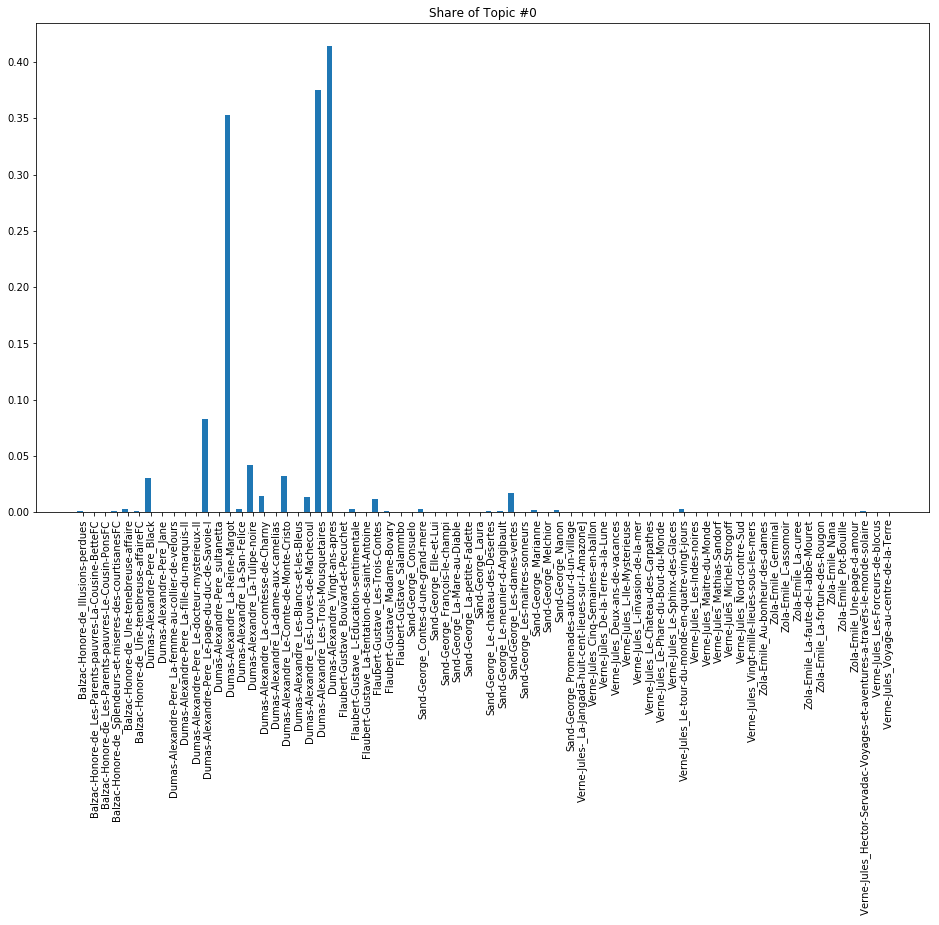

In [31]:
plt.show()

In [32]:
plots = []

In [33]:
height_cumulative = np.zeros(N)

In [34]:
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [35]:
plt.ylim((0, 1))

(0, 1)

In [36]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [37]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [38]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
Balzac-Honore-de_Illusions-perdues
numero 2
Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC
numero 3
Balzac-Honore-de_Les-Parents-pauvres-Le-Cousin-PonsFC
numero 4
Balzac-Honore-de_Splendeurs-et-miseres-des-courtisanesFC
numero 5
Balzac-Honore-de_Une-tenebreuse-affaire
numero 6
Balzac-Honore-de_Une-tenebreuse-affaireFC
numero 7
Dumas-Alexandre-Pere_Black
numero 8
Dumas-Alexandre-Pere_Jane
numero 9
Dumas-Alexandre-Pere_La-femme-au-collier-de-velours
numero 10
Dumas-Alexandre-Pere_La-fille-du-marquis-II
numero 11
Dumas-Alexandre-Pere_Le-docteur-mysterieux-II
numero 12
Dumas-Alexandre-Pere_Le-page-du-duc-de-Savoie-I
numero 13
Dumas-Alexandre-Pere_sultanetta
numero 14
Dumas-Alexandre_La-Reine-Margot
numero 15
Dumas-Alexandre_La-San-Felice
numero 16
Dumas-Alexandre_La-Tulipe-noire
numero 17
Dumas-Alexandre_La-comtesse-de-Charny
numero 18
Dumas-Alexandre_La-dame-aux-camelias
numero 19
Dumas-Alexandre_Le-Comte-de-Monte-Cristo
numero 20
Dumas-Alexandre_Les-Blancs-et-les-Bleus


In [39]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f4240ecdb38>],
 <a list of 1 Text yticklabel objects>)

In [40]:
list_topics =['aventure' ,'argent' ,'mort', 'amitié' ,'amour' ,'art' ,'crime' ,'éducation' ,'enfance' ,'famille' ,'folie' ,'guerre' ,'maladie' ,'nature' ,'politique' ,'dieu' ,'ville']

In [41]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics]

In [42]:
plt.legend([p[0] for p in plots], topic_labels)

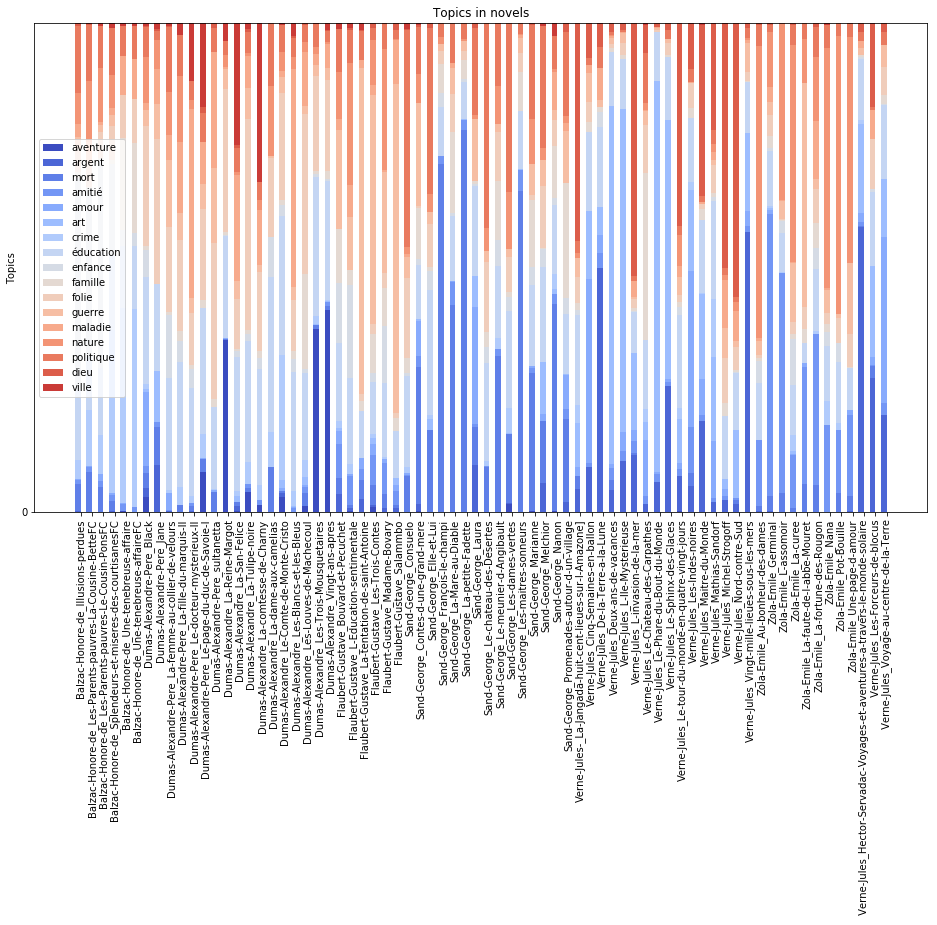

In [43]:
plt.show()